# 📚 Limpieza y Normalización de Datos - Estudiantes y Apoderados
## Agenda Virtual ATA - I.E. 80002 Antonio Torres Araujo

**Objetivo:** Limpiar, validar y preparar los datos del archivo CSV para posterior importación.

**Fases del proceso:**
1. ✅ **Fase 1:** Lectura y exploración inicial de datos
2. ✅ **Fase 2:** Limpieza de datos (espacios, mayúsculas, caracteres especiales)
3. ✅ **Fase 3:** Validación de datos (DNI, fechas, emails)
4. ✅ **Fase 4:** Normalización de campos
5. ✅ **Fase 5:** Detección de duplicados y errores
6. ✅ **Fase 6:** Exportación de datos limpios

---
**Nota:** Este notebook NO realiza importación a Supabase, solo prepara los datos.

---
## PASO 1: Importar Librerías Necesarias

## ⚙️ PASO 0: Instalar Dependencias (Ejecutar solo una vez)

In [43]:
# PASO 0: Instalar todas las dependencias necesarias
# Ejecuta esta celda SOLO UNA VEZ al inicio

import sys
import subprocess

print("📦 Instalando dependencias necesarias...")
print("="*80)

# Lista de paquetes necesarios
paquetes = [
    'pandas',      # Manipulación de datos (pd)
    'numpy',       # Operaciones numéricas (np)
    'openpyxl',    # Para leer archivos Excel (si fuera necesario)
    'python-dateutil'  # Para manejo de fechas (datetime)
]

for paquete in paquetes:
    try:
        print(f"\n🔧 Instalando {paquete}...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', paquete, '--quiet'])
        print(f"   ✅ {paquete} instalado correctamente")
    except Exception as e:
        print(f"   ❌ Error al instalar {paquete}: {e}")

print("\n" + "="*80)
print("✅ INSTALACIÓN COMPLETADA")
print("="*80)
print("\n📝 NOTA: Las librerías 're' y 'datetime' son estándar de Python, no requieren instalación")
print("\n🎯 Ahora puedes ejecutar el resto de las celdas con Shift + Enter")

📦 Instalando dependencias necesarias...

🔧 Instalando pandas...
   ✅ pandas instalado correctamente

🔧 Instalando numpy...
   ✅ pandas instalado correctamente

🔧 Instalando numpy...
   ✅ numpy instalado correctamente

🔧 Instalando openpyxl...
   ✅ numpy instalado correctamente

🔧 Instalando openpyxl...
   ✅ openpyxl instalado correctamente

🔧 Instalando python-dateutil...
   ✅ openpyxl instalado correctamente

🔧 Instalando python-dateutil...
   ✅ python-dateutil instalado correctamente

✅ INSTALACIÓN COMPLETADA

📝 NOTA: Las librerías 're' y 'datetime' son estándar de Python, no requieren instalación

🎯 Ahora puedes ejecutar el resto de las celdas con Shift + Enter
   ✅ python-dateutil instalado correctamente

✅ INSTALACIÓN COMPLETADA

📝 NOTA: Las librerías 're' y 'datetime' son estándar de Python, no requieren instalación

🎯 Ahora puedes ejecutar el resto de las celdas con Shift + Enter


In [1]:
# PASO 1: Importar librerías necesarias
import pandas as pd
import numpy as np
from datetime import datetime
import re
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías importadas correctamente")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

✅ Librerías importadas correctamente
📦 Pandas version: 2.2.2
📦 NumPy version: 1.26.4


## 📂 PASO 2: Leer el archivo de datos (CSV o Excel)

In [27]:
# PASO 2: Leer archivos (CSV Y Excel) - Mostrar información de ambos
import os

# Definir rutas de archivos
csv_path = '../data/estudiantes_apoderados_2025.csv'
excel_path = '../data/estudiantes_apoderados_2025.xlsx'

print("📂 Buscando archivos de datos...")
print("="*80)

# Detectar qué archivo existe
csv_existe = os.path.exists(csv_path)
excel_existe = os.path.exists(excel_path)

print(f"   CSV encontrado: {'✅' if csv_existe else '❌'} ({csv_path})")
print(f"   Excel encontrado: {'✅' if excel_existe else '❌'} ({excel_path})")

# Variables para almacenar información de ambos archivos
archivos_info = []
df = None

try:
    # Leer Excel si existe
    if excel_existe:
        print(f"\n📊 Leyendo archivo Excel...")
        df_excel = pd.read_excel(excel_path, sheet_name=0, engine='openpyxl')
        archivos_info.append(('Excel', df_excel, excel_path))
        print(f"   ✅ Excel: {len(df_excel):,} filas × {len(df_excel.columns)} columnas")
        df = df_excel  # Usar Excel como fuente principal
    
    # Leer CSV si existe
    if csv_existe:
        print(f"\n📄 Leyendo archivo CSV...")
        df_csv = pd.read_csv(csv_path, encoding='utf-8', sep=';', engine='python')  # ← Cambiado de ',' a ';'
        archivos_info.append(('CSV', df_csv, csv_path))
        print(f"   ✅ CSV: {len(df_csv):,} filas × {len(df_csv.columns)} columnas")
        if df is None:  # Si no hay Excel, usar CSV
            df = df_csv
    
    if not archivos_info:
        raise FileNotFoundError("No se encontró ningún archivo de datos")
    
    # Comparar archivos si existen ambos
    if len(archivos_info) == 2:
        print(f"\n📊 COMPARACIÓN ENTRE ARCHIVOS:")
        print(f"   • Filas: Excel {len(df_excel):,} | CSV {len(df_csv):,}")
        print(f"   • Columnas: Excel {len(df_excel.columns)} | CSV {len(df_csv.columns)}")
        
        if len(df_excel) == len(df_csv) and len(df_excel.columns) == len(df_csv.columns):
            print(f"   ✅ Ambos archivos tienen la misma estructura")
        else:
            print(f"   ⚠️  Los archivos tienen estructuras diferentes")
    
    # Mostrar información del archivo seleccionado
    tipo_usado = 'Excel' if excel_existe else 'CSV'
    print(f"\n🎯 ARCHIVO SELECCIONADO: {tipo_usado}")
    print(f"="*80)
    print(f"   • Total de filas: {len(df):,}")
    print(f"   • Total de columnas: {len(df.columns)}")
    print(f"   • Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print(f"\n📋 PRIMERAS 5 COLUMNAS:")
    for i, col in enumerate(df.columns[:5], 1):
        print(f"   {i}. {col}")
    
    print(f"\n📋 ÚLTIMAS 5 COLUMNAS:")
    for i, col in enumerate(df.columns[-5:], len(df.columns)-4):
        print(f"   {i}. {col}")
    
    # Estadísticas de datos faltantes (SIN ELIMINARLOS)
    print(f"\n📊 ESTADÍSTICAS DE DATOS OPCIONALES:")
    print(f"="*80)
    nulos_totales = df.isnull().sum().sum()
    campos_totales = len(df) * len(df.columns)
    porcentaje_completo = ((campos_totales - nulos_totales) / campos_totales) * 100
    
    print(f"   • Campos con datos: {campos_totales - nulos_totales:,} ({porcentaje_completo:.1f}%)")
    print(f"   • Campos vacíos: {nulos_totales:,} ({100-porcentaje_completo:.1f}%)")
    print(f"\n   💡 NOTA IMPORTANTE:")
    print(f"   Los registros con datos faltantes NO se eliminarán.")
    print(f"   La notificación por Web Push NO requiere teléfono/email.")
    print(f"   Solo necesitan: DNI + Nombre + Relación con estudiante.")
    
except FileNotFoundError as e:
    print("\n❌ ERROR: No se encontraron archivos de datos")
    print(f"\n💡 Asegúrate de tener uno de estos archivos en 'database/data/':")
    print(f"   • estudiantes_apoderados_2025.xlsx")
    print(f"   • estudiantes_apoderados_2025.csv")
    
except Exception as e:
    print(f"\n❌ Error al leer el archivo: {e}")
    print("\n💡 Verifica que:")
    print("   1. El archivo Excel/CSV existe en la ruta correcta")
    print("   2. El archivo CSV tiene codificación UTF-8")
    print("   3. La primera fila contiene los encabezados con prefijos")

📂 Buscando archivos de datos...
   CSV encontrado: ✅ (../data/estudiantes_apoderados_2025.csv)
   Excel encontrado: ✅ (../data/estudiantes_apoderados_2025.xlsx)

📊 Leyendo archivo Excel...
   ✅ Excel: 798 filas × 38 columnas

📄 Leyendo archivo CSV...
   ✅ CSV: 799 filas × 38 columnas

📊 COMPARACIÓN ENTRE ARCHIVOS:
   • Filas: Excel 798 | CSV 799
   • Columnas: Excel 38 | CSV 38
   ⚠️  Los archivos tienen estructuras diferentes

🎯 ARCHIVO SELECCIONADO: Excel
   • Total de filas: 798
   • Total de columnas: 38
   • Tamaño en memoria: 1.51 MB

📋 PRIMERAS 5 COLUMNAS:
   1. ITEM
   2. ESTUDIANTE_GRADO
   3. ESTUDIANTE_SECCION
   4. ESTUDIANTE_TIPO_DE_DOCUMENTO
   5. ESTUDIANTE_NUMERO_DE_DOCUMENTO

📋 ÚLTIMAS 5 COLUMNAS:
   34. APODERADO_TIPO_DE_DOCUMENTO
   35. APODERADO_NUMERO_DE_DOCUMENTO
   36. APODERADO_VALIDADO_CON_RENIEC
   37. APODERADO_CORREO_ELECTRÓNICO
   38. APODERADO_NUMERO_CELULAR

📊 ESTADÍSTICAS DE DATOS OPCIONALES:
   • Campos con datos: 27,509 (90.7%)
   • Campos vacíos: 2,81

## 🔍 PASO 3: Exploración inicial de datos

In [2]:
# PASO 3.1: Ver las primeras filas del dataset
print("📋 PRIMERAS 5 FILAS DEL DATASET:")
print("="*100)
df.head()

📋 PRIMERAS 5 FILAS DEL DATASET:


NameError: name 'df' is not defined

In [23]:
# PASO 3.2: Ver nombres de todas las columnas
print("📋 NOMBRES DE LAS COLUMNAS:")
print("="*100)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")
    
print(f"\n📊 Total de columnas: {len(df.columns)}")

📋 NOMBRES DE LAS COLUMNAS:
 1. ITEM
 2. ESTUDIANTE_GRADO
 3. ESTUDIANTE_SECCION
 4. ESTUDIANTE_TIPO_DE_DOCUMENTO
 5. ESTUDIANTE_NUMERO_DE_DOCUMENTO
 6. ESTUDIANTE_VALIDADO_CON_RENIEC
 7. ESTUDIANTE_CODIGO_DEL_ESTUDIANTE
 8. ESTUDIANTE_APELLIDO_PATERNO
 9. ESTUDIANTE_APELLIDO_MATERNO
10. ESTUDIANTE_NOMBRES
11. ESTUDIANTE_SEXO
12. ESTUDIANTE_FECHA_DE_NACIMIENTO
13. ESTUDIANTE_EDAD_AL_31_DE_MARZO
14. ESTUDIANTE_ESTADO_ DE_MATRICULA
15. PADRE_APELLIDOS_NOMBRES
16. PADRE_SEXO
17. PADRE_PARENTESCO
18. PADRE_TIPO_DE_DOCUMENTO
19. PADRE_NUMERO_DE_DOCUMENTO
20. PADRE_VALIDADO_CON_RENIEC
21. PADRE_CORREO_ELECTRÓNICO
22. PADRE_NUMERO_CELULAR
23. MADRE_APELLIDOS_NOMBRES
24. MADRE_SEXO
25. MADRE_PARENTESCO
26. MADRE_TIPO_DE_DOCUMENTO
27. MADRE_NUMERO_DE_DOCUMENTO
28. MADRE_VALIDADO_CON_RENIEC
29. MADRE_CORREO_ELECTRONICO
30. MADRE_NUMERO_CELULAR
31. APODERADO_APELLIDOS_NOMBRES
32. APODERADO_SEXO
33. APODERADO_PARENTESCO
34. APODERADO_TIPO_DE_DOCUMENTO
35. APODERADO_NUMERO_DE_DOCUMENTO
36. APODERADO

In [24]:
# PASO 3.2.5: VERIFICAR COLUMNAS DE DNI (TIPO vs NÚMERO)
print("🔍 VERIFICACIÓN DE COLUMNAS DNI - TIPO vs NÚMERO")
print("="*100)

# Buscar columnas relacionadas con DNI del estudiante
columnas_dni = [col for col in df.columns if 'ESTUDIANTE' in col and ('TIPO' in col or 'NUMERO' in col) and 'DOCUMENTO' in col]

print("\n📋 COLUMNAS DE DOCUMENTO DEL ESTUDIANTE ENCONTRADAS:")
for i, col in enumerate(columnas_dni, 1):
    print(f"   {i}. {col}")

# Mostrar ejemplo de las primeras 5 filas
print("\n📊 EJEMPLO DE DATOS (primeras 5 filas):")
print("="*100)

if len(columnas_dni) >= 2:
    ejemplo = df[columnas_dni].head()
    print(ejemplo.to_string(index=False))
    
    # Verificar contenido
    col_tipo = [c for c in columnas_dni if 'TIPO' in c][0] if any('TIPO' in c for c in columnas_dni) else None
    col_numero = [c for c in columnas_dni if 'NUMERO' in c][0] if any('NUMERO' in c for c in columnas_dni) else None
    
    if col_tipo and col_numero:
        print(f"\n✅ COLUMNAS IDENTIFICADAS:")
        print(f"   • TIPO DE DOCUMENTO: '{col_tipo}'")
        print(f"   • NÚMERO DE DOCUMENTO: '{col_numero}'")
        
        print(f"\n📊 ANÁLISIS DE CONTENIDO:")
        print(f"\n   Columna '{col_tipo}':")
        valores_tipo = df[col_tipo].unique()[:10]
        print(f"   Valores únicos: {valores_tipo}")
        
        print(f"\n   Columna '{col_numero}':")
        ejemplos_numero = df[col_numero].dropna().head(5).tolist()
        print(f"   Ejemplo de valores: {ejemplos_numero}")
        
        # Determinar cuál tiene DNI
        tipo_tiene_numeros = df[col_tipo].apply(lambda x: str(x).replace('.', '').replace(',', '').isdigit() if pd.notna(x) else False).sum()
        numero_tiene_numeros = df[col_numero].apply(lambda x: str(x).replace('.', '').replace(',', '').isdigit() if pd.notna(x) else False).sum()
        
        print(f"\n🔍 DIAGNÓSTICO:")
        print(f"   '{col_tipo}' tiene {tipo_tiene_numeros} valores numéricos de {len(df)}")
        print(f"   '{col_numero}' tiene {numero_tiene_numeros} valores numéricos de {len(df)}")
        
        if numero_tiene_numeros > tipo_tiene_numeros:
            print(f"\n✅ CORRECTO: El DNI está en '{col_numero}'")
            print(f"\n   📋 Contenido de columna TIPO:")
            tipo_valores = df[col_tipo].value_counts()
            for tipo, cantidad in tipo_valores.items():
                print(f"      • {tipo}: {cantidad} veces")
        else:
            print(f"\n⚠️  ADVERTENCIA: Posible confusión en las columnas")
            print(f"   El DNI parece estar en '{col_tipo}' en lugar de '{col_numero}'")
            print(f"\n   💡 RECOMENDACIÓN: Usar '{col_tipo}' para limpiar DNI")
    else:
        print("\n❌ No se pudieron identificar ambas columnas")
        print(f"   col_tipo encontrado: {col_tipo}")
        print(f"   col_numero encontrado: {col_numero}")
else:
    print(f"\n⚠️  Se encontraron {len(columnas_dni)} columna(s) relacionadas con documento")
    if len(columnas_dni) > 0:
        print("\n   Mostrando datos de la(s) columna(s) encontrada(s):")
        print(df[columnas_dni].head().to_string(index=False))

print("\n" + "="*100)

🔍 VERIFICACIÓN DE COLUMNAS DNI - TIPO vs NÚMERO

📋 COLUMNAS DE DOCUMENTO DEL ESTUDIANTE ENCONTRADAS:
   1. ESTUDIANTE_TIPO_DE_DOCUMENTO
   2. ESTUDIANTE_NUMERO_DE_DOCUMENTO

📊 EJEMPLO DE DATOS (primeras 5 filas):
ESTUDIANTE_TIPO_DE_DOCUMENTO  ESTUDIANTE_NUMERO_DE_DOCUMENTO
                         DNI                      77927245.0
                         NaN                             NaN
                         DNI                      80808595.0
                         DNI                      77925990.0
                         DNI                      77644801.0

✅ COLUMNAS IDENTIFICADAS:
   • TIPO DE DOCUMENTO: 'ESTUDIANTE_TIPO_DE_DOCUMENTO'
   • NÚMERO DE DOCUMENTO: 'ESTUDIANTE_NUMERO_DE_DOCUMENTO'

📊 ANÁLISIS DE CONTENIDO:

   Columna 'ESTUDIANTE_TIPO_DE_DOCUMENTO':
   Valores únicos: ['DNI' nan 'CE' 'PAS']

   Columna 'ESTUDIANTE_NUMERO_DE_DOCUMENTO':
   Ejemplo de valores: [77927245.0, 80808595.0, 77925990.0, 77644801.0, 63781543.0]

🔍 DIAGNÓSTICO:
   'ESTUDIANTE_TIPO_DE

In [6]:
# PASO 3.3: Información general del dataset
print("📊 INFORMACIÓN DEL DATASET:")
print("="*100)
df.info()

📊 INFORMACIÓN DEL DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ITEM                              798 non-null    int64  
 1   ESTUDIANTE_GRADO                  798 non-null    object 
 2   ESTUDIANTE_SECCION                798 non-null    object 
 3   ESTUDIANTE_TIPO_DE_DOCUMENTO      779 non-null    object 
 4   ESTUDIANTE_NUMERO_DE_DOCUMENTO    779 non-null    float64
 5   ESTUDIANTE_VALIDADO_CON_RENIEC    798 non-null    object 
 6   ESTUDIANTE_CODIGO_DEL_ESTUDIANTE  798 non-null    int64  
 7   ESTUDIANTE_APELLIDO_PATERNO       798 non-null    object 
 8   ESTUDIANTE_APELLIDO_MATERNO       798 non-null    object 
 9   ESTUDIANTE_NOMBRES                798 non-null    object 
 10  ESTUDIANTE_SEXO                   798 non-null    object 
 11  ESTUDIANTE_FECHA_DE_NACIMIENTO    798 non-nu

In [7]:
# PASO 3.4: Detectar valores nulos (SIN ELIMINARLOS)
print("🔍 VALORES NULOS POR COLUMNA:")
print("="*100)
nulos = df.isnull().sum()
nulos_porcentaje = (df.isnull().sum() / len(df)) * 100

resumen_nulos = pd.DataFrame({
    'Columna': nulos.index,
    'Nulos': nulos.values,
    'Porcentaje': nulos_porcentaje.values
})

# Mostrar solo columnas con nulos
resumen_nulos_filtrado = resumen_nulos[resumen_nulos['Nulos'] > 0].sort_values('Nulos', ascending=False)

if len(resumen_nulos_filtrado) > 0:
    print(resumen_nulos_filtrado.to_string(index=False))
    print(f"\n📌 IMPORTANTE:")
    print(f"   ✅ Los nulos NO se eliminarán del dataset")
    print(f"   ✅ Son datos opcionales para Web Push")
    print(f"   ✅ Solo se requiere: DNI + Nombre + Relación con estudiante")
else:
    print("✅ No hay valores nulos en el dataset")

🔍 VALORES NULOS POR COLUMNA:
                       Columna  Nulos  Porcentaje
      PADRE_CORREO_ELECTRÓNICO    636   79.699248
      MADRE_CORREO_ELECTRONICO    434   54.385965
  APODERADO_CORREO_ELECTRÓNICO    415   52.005013
          PADRE_NUMERO_CELULAR    275   34.461153
       PADRE_TIPO_DE_DOCUMENTO    158   19.799499
     PADRE_NUMERO_DE_DOCUMENTO    158   19.799499
          MADRE_NUMERO_CELULAR     91   11.403509
     MADRE_NUMERO_DE_DOCUMENTO     90   11.278195
 APODERADO_NUMERO_DE_DOCUMENTO     89   11.152882
       MADRE_TIPO_DE_DOCUMENTO     89   11.152882
   APODERADO_TIPO_DE_DOCUMENTO     88   11.027569
      APODERADO_NUMERO_CELULAR     66    8.270677
       PADRE_APELLIDOS_NOMBRES     45    5.639098
                    PADRE_SEXO     45    5.639098
              PADRE_PARENTESCO     45    5.639098
     PADRE_VALIDADO_CON_RENIEC     45    5.639098
  ESTUDIANTE_TIPO_DE_DOCUMENTO     19    2.380952
ESTUDIANTE_NUMERO_DE_DOCUMENTO     19    2.380952
     MADRE_VALIDADO_C

In [8]:
# PASO 3.5: Comparar conteo de datos entre Excel y CSV
print("🔍 COMPARACIÓN DE COMPLETITUD: Excel vs CSV")
print("="*100)

# Verificar si tenemos ambos archivos cargados
if 'df_excel' in locals() and 'df_csv' in locals():
    print("\n📊 CONTEO DE VALORES NO NULOS POR COLUMNA:\n")
    print("="*100)
    
    # Crear DataFrame comparativo
    comparacion = pd.DataFrame({
        'Columna': df_excel.columns,
        'Excel_Total': len(df_excel),
        'Excel_Completos': df_excel.notna().sum().values,
        'Excel_%': (df_excel.notna().sum() / len(df_excel) * 100).values,
        'CSV_Total': len(df_csv) if len(df_csv.columns) == len(df_excel.columns) else 0,
        'CSV_Completos': df_csv.notna().sum().values if len(df_csv.columns) == len(df_excel.columns) else 0,
        'CSV_%': (df_csv.notna().sum() / len(df_csv) * 100).values if len(df_csv.columns) == len(df_excel.columns) else 0
    })
    
    # Calcular diferencias
    if len(df_csv.columns) == len(df_excel.columns):
        comparacion['Diferencia'] = comparacion['Excel_Completos'] - comparacion['CSV_Completos']
        comparacion['Estado'] = comparacion['Diferencia'].apply(lambda x: '✅ Igual' if x == 0 else f'⚠️ Diff: {int(x)}')
    
    # Mostrar tabla completa
    print(comparacion.to_string(index=False))
    
    # Resumen
    print("\n" + "="*100)
    print("📊 RESUMEN GENERAL:")
    print("="*100)
    print(f"\n📁 EXCEL:")
    print(f"   • Total filas: {len(df_excel):,}")
    print(f"   • Total columnas: {len(df_excel.columns)}")
    print(f"   • Campos completos: {df_excel.notna().sum().sum():,}")
    print(f"   • Campos vacíos: {df_excel.isna().sum().sum():,}")
    print(f"   • Completitud: {(df_excel.notna().sum().sum() / (len(df_excel) * len(df_excel.columns)) * 100):.1f}%")
    
    print(f"\n📄 CSV:")
    print(f"   • Total filas: {len(df_csv):,}")
    print(f"   • Total columnas: {len(df_csv.columns)}")
    if len(df_csv.columns) == len(df_excel.columns):
        print(f"   • Campos completos: {df_csv.notna().sum().sum():,}")
        print(f"   • Campos vacíos: {df_csv.isna().sum().sum():,}")
        print(f"   • Completitud: {(df_csv.notna().sum().sum() / (len(df_csv) * len(df_csv.columns)) * 100):.1f}%")
    else:
        print(f"   ⚠️ CSV tiene estructura diferente (solo {len(df_csv.columns)} columnas)")
    
    # Verificar inconsistencias
    if len(df_csv.columns) == len(df_excel.columns):
        inconsistencias = comparacion[comparacion['Diferencia'] != 0]
        if len(inconsistencias) > 0:
            print(f"\n⚠️ ADVERTENCIA: Se encontraron {len(inconsistencias)} columnas con diferencias:")
            for idx, row in inconsistencias.iterrows():
                print(f"   • {row['Columna']}: Excel={int(row['Excel_Completos'])} vs CSV={int(row['CSV_Completos'])}")
        else:
            print(f"\n✅ PERFECTO: Excel y CSV tienen exactamente los mismos datos completos")
    
else:
    print("\n⚠️ Solo se cargó un archivo. Mostrando datos del archivo disponible:\n")
    
    archivo_actual = df_excel if 'df_excel' in locals() else df_csv if 'df_csv' in locals() else df
    nombre_archivo = 'Excel' if 'df_excel' in locals() else 'CSV' if 'df_csv' in locals() else 'Archivo actual'
    
    print(f"📊 CONTEO DE VALORES NO NULOS - {nombre_archivo}:")
    print("="*100)
    
    conteo = pd.DataFrame({
        'Columna': archivo_actual.columns,
        'Total_Filas': len(archivo_actual),
        'Valores_Completos': archivo_actual.notna().sum().values,
        'Valores_Nulos': archivo_actual.isna().sum().values,
        'Porcentaje_Completo': (archivo_actual.notna().sum() / len(archivo_actual) * 100).values
    })
    
    print(conteo.to_string(index=False))
    
    print("\n" + "="*100)
    print(f"📊 RESUMEN - {nombre_archivo}:")
    print("="*100)
    print(f"   • Total filas: {len(archivo_actual):,}")
    print(f"   • Total columnas: {len(archivo_actual.columns)}")
    print(f"   • Campos completos: {archivo_actual.notna().sum().sum():,}")
    print(f"   • Campos vacíos: {archivo_actual.isna().sum().sum():,}")
    print(f"   • Completitud general: {(archivo_actual.notna().sum().sum() / (len(archivo_actual) * len(archivo_actual.columns)) * 100):.1f}%")

print("\n" + "="*100)

🔍 COMPARACIÓN DE COMPLETITUD: Excel vs CSV

📊 CONTEO DE VALORES NO NULOS POR COLUMNA:

                         Columna  Excel_Total  Excel_Completos    Excel_%  CSV_Total  CSV_Completos     CSV_%  Diferencia  Estado
                            ITEM          798              798 100.000000        799            798 99.874844           0 ✅ Igual
                ESTUDIANTE_GRADO          798              798 100.000000        799            798 99.874844           0 ✅ Igual
              ESTUDIANTE_SECCION          798              798 100.000000        799            798 99.874844           0 ✅ Igual
    ESTUDIANTE_TIPO_DE_DOCUMENTO          798              779  97.619048        799            779 97.496871           0 ✅ Igual
  ESTUDIANTE_NUMERO_DE_DOCUMENTO          798              779  97.619048        799            779 97.496871           0 ✅ Igual
  ESTUDIANTE_VALIDADO_CON_RENIEC          798              798 100.000000        799            798 99.874844           0 ✅ Igual
EST

## 🧹 PASO 4: Funciones de limpieza

In [33]:
# PASO 4.1: Definir funciones de limpieza de datos

def limpiar_texto(texto):
    """Limpia y normaliza texto: quita espacios extras, convierte a mayúsculas"""
    if pd.isna(texto):
        return None
    return str(texto).strip().upper()

def limpiar_dni(dni):
    """Limpia y valida DNI (8 dígitos)"""
    if pd.isna(dni):
        return None
    # Convertir a string y quitar espacios
    dni_str = str(dni).strip().replace(' ', '')
    # Si es float con .0, quitar la parte decimal (formato Excel: 12345678.0)
    if '.' in dni_str:
        dni_str = dni_str.split('.')[0]
    # Validar que tenga 8 dígitos
    if len(dni_str) == 8 and dni_str.isdigit():
        return dni_str
    return None

def limpiar_email(email):
    """Limpia y valida email"""
    if pd.isna(email):
        return None
    email_str = str(email).strip().lower()
    # Validación básica de email
    if '@' in email_str and '.' in email_str:
        return email_str
    return None

def limpiar_telefono(telefono):
    """Limpia número de teléfono (9 dígitos para Perú)"""
    if pd.isna(telefono):
        return None
    tel_str = str(telefono).strip().replace(' ', '').replace('-', '')
    # Si es float, quitar la parte decimal
    if '.' in tel_str:
        tel_str = tel_str.split('.')[0]
    # Validar que tenga 9 dígitos (celular en Perú)
    if len(tel_str) == 9 and tel_str.isdigit():
        return tel_str
    return None

def limpiar_fecha(fecha):
    """Convierte fecha a formato estándar YYYY-MM-DD"""
    if pd.isna(fecha):
        return None
    try:
        # Intentar convertir a datetime
        fecha_dt = pd.to_datetime(fecha, dayfirst=True)
        return fecha_dt.strftime('%Y-%m-%d')
    except:
        return None

print("✅ Funciones de limpieza definidas:")
print("   • limpiar_texto()")
print("   • limpiar_dni() ← CORREGIDO (elimina solo .0 de Excel)")
print("   • limpiar_email()")
print("   • limpiar_telefono()")
print("   • limpiar_fecha()")

✅ Funciones de limpieza definidas:
   • limpiar_texto()
   • limpiar_dni() ← CORREGIDO (elimina solo .0 de Excel)
   • limpiar_email()
   • limpiar_telefono()
   • limpiar_fecha()


## 🔧 PASO 5: Aplicar limpieza a columnas específicas

In [34]:
# PASO 5.1: Crear copia del dataframe para no modificar el original
df_limpio = df.copy()

print("✅ Copia del dataframe creada")
print(f"📊 Filas en dataframe original: {len(df):,}")
print(f"📊 Filas en dataframe limpio: {len(df_limpio):,}")

✅ Copia del dataframe creada
📊 Filas en dataframe original: 798
📊 Filas en dataframe limpio: 798


In [35]:
# PASO 5.2: Aplicar limpieza a campos de texto (nombres, apellidos)
print("🧹 Limpiando campos de texto...")

# Columnas de texto a limpiar (con nuevos prefijos)
columnas_texto = [
    'ESTUDIANTE_APELLIDO_PATERNO',
    'ESTUDIANTE_APELLIDO_MATERNO', 
    'ESTUDIANTE_NOMBRES',
    'ESTUDIANTE_GRADO',
    'ESTUDIANTE_SECCION'
]

for col in columnas_texto:
    if col in df_limpio.columns:
        df_limpio[col] = df_limpio[col].apply(limpiar_texto)
        print(f"   ✓ {col}")
    else:
        print(f"   ⚠️  Columna no encontrada: {col}")

print("\n✅ Limpieza de texto completada")

🧹 Limpiando campos de texto...
   ✓ ESTUDIANTE_APELLIDO_PATERNO
   ✓ ESTUDIANTE_APELLIDO_MATERNO
   ✓ ESTUDIANTE_NOMBRES
   ✓ ESTUDIANTE_GRADO
   ✓ ESTUDIANTE_SECCION

✅ Limpieza de texto completada


In [36]:
# PASO 5.3: Limpiar y validar DNI del estudiante
print("🧹 Limpiando y validando DNI del estudiante...")

columna_dni = 'ESTUDIANTE_NUMERO_DE_DOCUMENTO'

if columna_dni in df_limpio.columns:
    # Contar DNI inválidos antes
    dni_invalidos_antes = df_limpio[columna_dni].isna().sum()
    
    # Aplicar limpieza
    df_limpio[columna_dni] = df_limpio[columna_dni].apply(limpiar_dni)
    
    # Contar DNI inválidos después
    dni_invalidos_despues = df_limpio[columna_dni].isna().sum()
    
    print(f"   ✓ Columna procesada: {columna_dni}")
    print(f"      - DNI nulos antes: {dni_invalidos_antes}")
    print(f"      - DNI nulos después: {dni_invalidos_despues}")
    print(f"      - DNI válidos: {len(df_limpio) - dni_invalidos_despues}")
else:
    print(f"   ⚠️  Columna '{columna_dni}' no encontrada")

print("\n✅ Limpieza de DNI completada")

🧹 Limpiando y validando DNI del estudiante...
   ✓ Columna procesada: ESTUDIANTE_NUMERO_DE_DOCUMENTO
      - DNI nulos antes: 19
      - DNI nulos después: 26
      - DNI válidos: 772

✅ Limpieza de DNI completada


In [37]:
# PASO 5.4: Limpiar fechas de nacimiento
print("🧹 Limpiando fechas de nacimiento...")

columna_fecha = 'ESTUDIANTE_FECHA_DE_NACIMIENTO'

if columna_fecha in df_limpio.columns:
    fechas_invalidas_antes = df_limpio[columna_fecha].isna().sum()
    
    df_limpio[columna_fecha] = df_limpio[columna_fecha].apply(limpiar_fecha)
    
    fechas_invalidas_despues = df_limpio[columna_fecha].isna().sum()
    
    print(f"   ✓ {columna_fecha}")
    print(f"      - Fechas nulas antes: {fechas_invalidas_antes}")
    print(f"      - Fechas nulas después: {fechas_invalidas_despues}")
    print(f"      - Fechas válidas: {len(df_limpio) - fechas_invalidas_despues}")
else:
    print(f"   ⚠️  Columna no encontrada: {columna_fecha}")

print("\n✅ Limpieza de fechas completada")

🧹 Limpiando fechas de nacimiento...
   ✓ ESTUDIANTE_FECHA_DE_NACIMIENTO
      - Fechas nulas antes: 0
      - Fechas nulas después: 0
      - Fechas válidas: 798

✅ Limpieza de fechas completada
   ✓ ESTUDIANTE_FECHA_DE_NACIMIENTO
      - Fechas nulas antes: 0
      - Fechas nulas después: 0
      - Fechas válidas: 798

✅ Limpieza de fechas completada


## 🔍 PASO 6: Validación y detección de errores

In [38]:
# PASO 6.1: Detectar DNI duplicados
print("🔍 Detectando DNI duplicados...")

# ⚠️ IMPORTANTE: DNI está en la columna NUMERO (sin tilde)
columna_dni = 'ESTUDIANTE_NUMERO_DE_DOCUMENTO'  # ← Aquí están los DNI

if columna_dni in df_limpio.columns:
    # Filtrar solo registros con DNI válido
    df_con_dni = df_limpio[df_limpio[columna_dni].notna()]
    
    duplicados_dni = df_con_dni[df_con_dni.duplicated(subset=[columna_dni], keep=False)]
    
    if len(duplicados_dni) > 0:
        print(f"\n⚠️  ENCONTRADOS {len(duplicados_dni)} REGISTROS CON DNI DUPLICADO:")
        cols_mostrar = [columna_dni, 'ESTUDIANTE_APELLIDO_PATERNO', 'ESTUDIANTE_APELLIDO_MATERNO', 'ESTUDIANTE_NOMBRES']
        # Filtrar solo las columnas que existen
        cols_mostrar = [c for c in cols_mostrar if c in duplicados_dni.columns]
        print(duplicados_dni[cols_mostrar].to_string(index=False))
    else:
        print("\n✅ No se encontraron DNI duplicados")
else:
    print(f"\n❌ Columna '{columna_dni}' no encontrada")

🔍 Detectando DNI duplicados...

⚠️  ENCONTRADOS 4 REGISTROS CON DNI DUPLICADO:
ESTUDIANTE_NUMERO_DE_DOCUMENTO ESTUDIANTE_APELLIDO_PATERNO ESTUDIANTE_APELLIDO_MATERNO ESTUDIANTE_NOMBRES
                      77557332                    CEVERINO                       LEIVA       IKER MARCELO
                      77557332                    CEVERINO                       LEIVA       IKER MARCELO
                      61502887                    TERRONES                      LLATAS       LUZ ANGELICA
                      61502887                    TERRONES                      LLATAS       LUZ ANGELICA


In [15]:
# PASO 6.2: Validar distribución por grado y sección
print("📊 Distribución de estudiantes por GRADO y SECCIÓN:")
print("="*60)

col_grado = 'ESTUDIANTE_GRADO'
col_seccion = 'ESTUDIANTE_SECCION'

if col_grado in df_limpio.columns and col_seccion in df_limpio.columns:
    distribucion = df_limpio.groupby([col_grado, col_seccion]).size().reset_index(name='Cantidad')
    distribucion_pivot = distribucion.pivot(index=col_grado, columns=col_seccion, values='Cantidad').fillna(0).astype(int)
    
    print(distribucion_pivot)
    print(f"\n📌 Total de estudiantes: {len(df_limpio):,}")
else:
    print(f"❌ Columnas '{col_grado}' o '{col_seccion}' no encontradas")

📊 Distribución de estudiantes por GRADO y SECCIÓN:
ESTUDIANTE_SECCION   A   B   C   D   E
ESTUDIANTE_GRADO                      
CUARTO              36  35  32  32   0
PRIMERO             40  38  34  34  36
QUINTO              39  34  35  37   0
SEGUNDO             29  27  40  42  27
TERCERO             35  35  34  32  35

📌 Total de estudiantes: 798
ESTUDIANTE_SECCION   A   B   C   D   E
ESTUDIANTE_GRADO                      
CUARTO              36  35  32  32   0
PRIMERO             40  38  34  34  36
QUINTO              39  34  35  37   0
SEGUNDO             29  27  40  42  27
TERCERO             35  35  34  32  35

📌 Total de estudiantes: 798


In [16]:
# PASO 6.3: Estadísticas por sexo
print("👥 Distribución por SEXO:")
print("="*60)

col_sexo = 'ESTUDIANTE_SEXO'

if col_sexo in df_limpio.columns:
    distribucion_sexo = df_limpio[col_sexo].value_counts()
    print(distribucion_sexo)
    print(f"\n📌 Total: {distribucion_sexo.sum():,}")
else:
    print(f"❌ Columna '{col_sexo}' no encontrada")

👥 Distribución por SEXO:
ESTUDIANTE_SEXO
Hombre    431
Mujer     367
Name: count, dtype: int64

📌 Total: 798


## 💾 PASO 7: Exportar datos limpios

In [39]:
# PASO 7.1: Exportar datos limpios a CSV
output_path = '../data/estudiantes_apoderados_2025_LIMPIO.csv'

try:
    df_limpio.to_csv(output_path, index=False, encoding='utf-8')
    print("✅ Datos limpios exportados exitosamente")
    print(f"📁 Ubicación: {output_path}")
    print(f"📊 Registros exportados: {len(df_limpio):,}")
except Exception as e:
    print(f"❌ Error al exportar: {e}")

✅ Datos limpios exportados exitosamente
📁 Ubicación: ../data/estudiantes_apoderados_2025_LIMPIO.csv
📊 Registros exportados: 798


## 📊 PASO 8: Resumen final del proceso

In [18]:
# PASO 8: Resumen final
print("="*80)
print("📊 RESUMEN FINAL DEL PROCESO DE LIMPIEZA")
print("="*80)

print(f"\n✅ DATOS ORIGINALES:")
print(f"   • Total de registros: {len(df):,}")
print(f"   • Total de columnas: {len(df.columns)}")

print(f"\n✅ DATOS LIMPIOS:")
print(f"   • Total de registros: {len(df_limpio):,}")
print(f"   • Total de columnas: {len(df_limpio.columns)}")
print(f"   • Registros conservados: 100% (no se eliminaron filas)")

print(f"\n📁 ARCHIVOS GENERADOS:")
print(f"   ✓ {output_path}")

print(f"\n📊 CAMPOS REQUERIDOS PARA WEB PUSH:")
print(f"   ✅ DNI del padre/madre/apoderado")
print(f"   ✅ Nombre completo del padre/madre/apoderado")
print(f"   ✅ Relación con el estudiante (PADRE/MADRE/APODERADO)")
print(f"   ✅ Nombre del estudiante (hijo/hija)")
print(f"   ⚠️  Teléfono/Email: OPCIONALES (no requeridos para Web Push)")

print(f"\n🎯 PRÓXIMOS PASOS:")
print(f"   1. Revisar el archivo limpio generado")
print(f"   2. Verificar relaciones estudiante-padre/madre")
print(f"   3. Importar a Supabase (en otro notebook)")
print(f"   4. Configurar Web Push para notificaciones")

print("\n" + "="*80)
print("✅ PROCESO DE LIMPIEZA COMPLETADO")
print("="*80)

📊 RESUMEN FINAL DEL PROCESO DE LIMPIEZA

✅ DATOS ORIGINALES:
   • Total de registros: 798
   • Total de columnas: 38

✅ DATOS LIMPIOS:
   • Total de registros: 798
   • Total de columnas: 38
   • Registros conservados: 100% (no se eliminaron filas)

📁 ARCHIVOS GENERADOS:
   ✓ ../data/estudiantes_apoderados_2025_LIMPIO.csv

📊 CAMPOS REQUERIDOS PARA WEB PUSH:
   ✅ DNI del padre/madre/apoderado
   ✅ Nombre completo del padre/madre/apoderado
   ✅ Relación con el estudiante (PADRE/MADRE/APODERADO)
   ✅ Nombre del estudiante (hijo/hija)
   ⚠️  Teléfono/Email: OPCIONALES (no requeridos para Web Push)

🎯 PRÓXIMOS PASOS:
   1. Revisar el archivo limpio generado
   2. Verificar relaciones estudiante-padre/madre
   3. Importar a Supabase (en otro notebook)
   4. Configurar Web Push para notificaciones

✅ PROCESO DE LIMPIEZA COMPLETADO


## 📊 PASO 9: Análisis Estadístico y Visualizaciones

**Visualizaciones incluidas:**
- 📈 Distribución de estudiantes por grado y sección
- 👥 Distribución por sexo
- 📅 Distribución de edades
- 📋 Completitud de datos de apoderados
- 🔍 Análisis de calidad de datos


In [62]:
# PASO 9.0: Instalar librerías de visualización
import subprocess
import sys

print("📦 Instalando librerías de visualización...")
print("="*80)

paquetes_viz = ['matplotlib', 'seaborn']

for paquete in paquetes_viz:
    try:
        print(f"\n🔧 Instalando {paquete}...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', paquete, '--quiet'])
        print(f"   ✅ {paquete} instalado correctamente")
    except Exception as e:
        print(f"   ❌ Error al instalar {paquete}: {e}")

print("\n✅ Librerías de visualización instaladas")
print("="*80)

📦 Instalando librerías de visualización...

🔧 Instalando matplotlib...
   ✅ matplotlib instalado correctamente

🔧 Instalando seaborn...
   ✅ matplotlib instalado correctamente

🔧 Instalando seaborn...
   ✅ seaborn instalado correctamente

✅ Librerías de visualización instaladas
   ✅ seaborn instalado correctamente

✅ Librerías de visualización instaladas


In [63]:
# PASO 9.1: Importar librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Librerías de visualización importadas")
print("📊 Configuración de gráficos lista")

✅ Librerías de visualización importadas
📊 Configuración de gráficos lista


📊 GRÁFICO 1: Distribución de estudiantes por GRADO y SECCIÓN


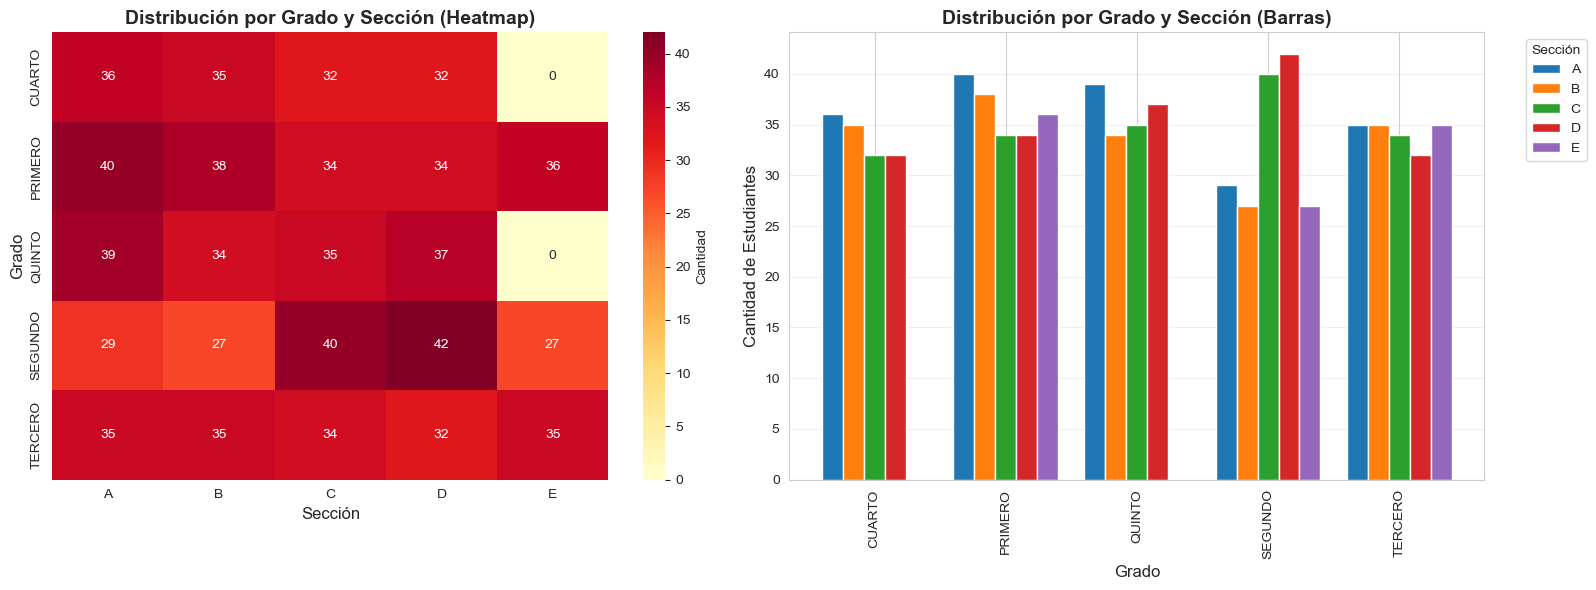


✅ Total de estudiantes: 798


In [64]:
# PASO 9.2: Gráfico de distribución por GRADO y SECCIÓN
print("📊 GRÁFICO 1: Distribución de estudiantes por GRADO y SECCIÓN")
print("="*80)

col_grado = 'ESTUDIANTE_GRADO'
col_seccion = 'ESTUDIANTE_SECCION'

if col_grado in df_limpio.columns and col_seccion in df_limpio.columns:
    # Crear distribución
    distribucion = df_limpio.groupby([col_grado, col_seccion]).size().reset_index(name='Cantidad')
    distribucion_pivot = distribucion.pivot(index=col_grado, columns=col_seccion, values='Cantidad').fillna(0)
    
    # Crear figura con 2 subgráficos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico 1: Heatmap
    sns.heatmap(distribucion_pivot, annot=True, fmt='g', cmap='YlOrRd', ax=ax1, cbar_kws={'label': 'Cantidad'})
    ax1.set_title('Distribución por Grado y Sección (Heatmap)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Sección', fontsize=12)
    ax1.set_ylabel('Grado', fontsize=12)
    
    # Gráfico 2: Barras agrupadas
    distribucion_pivot.plot(kind='bar', ax=ax2, width=0.8)
    ax2.set_title('Distribución por Grado y Sección (Barras)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Grado', fontsize=12)
    ax2.set_ylabel('Cantidad de Estudiantes', fontsize=12)
    ax2.legend(title='Sección', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✅ Total de estudiantes: {len(df_limpio):,}")
else:
    print(f"❌ No se pudieron generar los gráficos")

📊 GRÁFICO 2: Distribución de estudiantes por SEXO


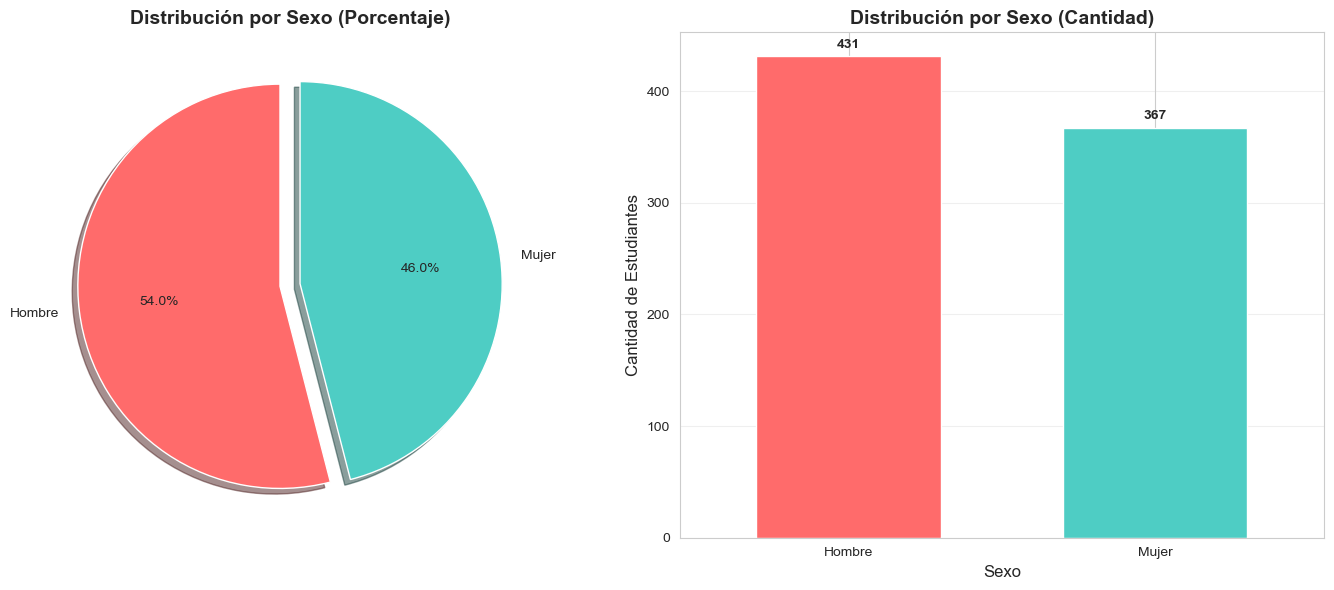


📊 Distribución:
   • Hombre: 431 (54.0%)
   • Mujer: 367 (46.0%)

✅ Total: 798


In [65]:
# PASO 9.3: Gráfico de distribución por SEXO
print("📊 GRÁFICO 2: Distribución de estudiantes por SEXO")
print("="*80)

col_sexo = 'ESTUDIANTE_SEXO'

if col_sexo in df_limpio.columns:
    # Contar por sexo
    distribucion_sexo = df_limpio[col_sexo].value_counts()
    
    # Crear figura con 2 subgráficos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Gráfico 1: Pie chart
    colors = ['#FF6B6B', '#4ECDC4']
    explode = (0.05, 0.05)
    ax1.pie(distribucion_sexo.values, labels=distribucion_sexo.index, autopct='%1.1f%%',
            startangle=90, colors=colors, explode=explode, shadow=True)
    ax1.set_title('Distribución por Sexo (Porcentaje)', fontsize=14, fontweight='bold')
    
    # Gráfico 2: Barras
    distribucion_sexo.plot(kind='bar', ax=ax2, color=colors, width=0.6)
    ax2.set_title('Distribución por Sexo (Cantidad)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Sexo', fontsize=12)
    ax2.set_ylabel('Cantidad de Estudiantes', fontsize=12)
    ax2.grid(axis='y', alpha=0.3)
    ax2.set_xticklabels(distribucion_sexo.index, rotation=0)
    
    # Agregar valores en las barras
    for i, v in enumerate(distribucion_sexo.values):
        ax2.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Distribución:")
    for sexo, cantidad in distribucion_sexo.items():
        porcentaje = (cantidad / distribucion_sexo.sum()) * 100
        print(f"   • {sexo}: {cantidad:,} ({porcentaje:.1f}%)")
    print(f"\n✅ Total: {distribucion_sexo.sum():,}")
else:
    print(f"❌ No se pudieron generar los gráficos")

📊 GRÁFICO 3: Distribución de EDADES


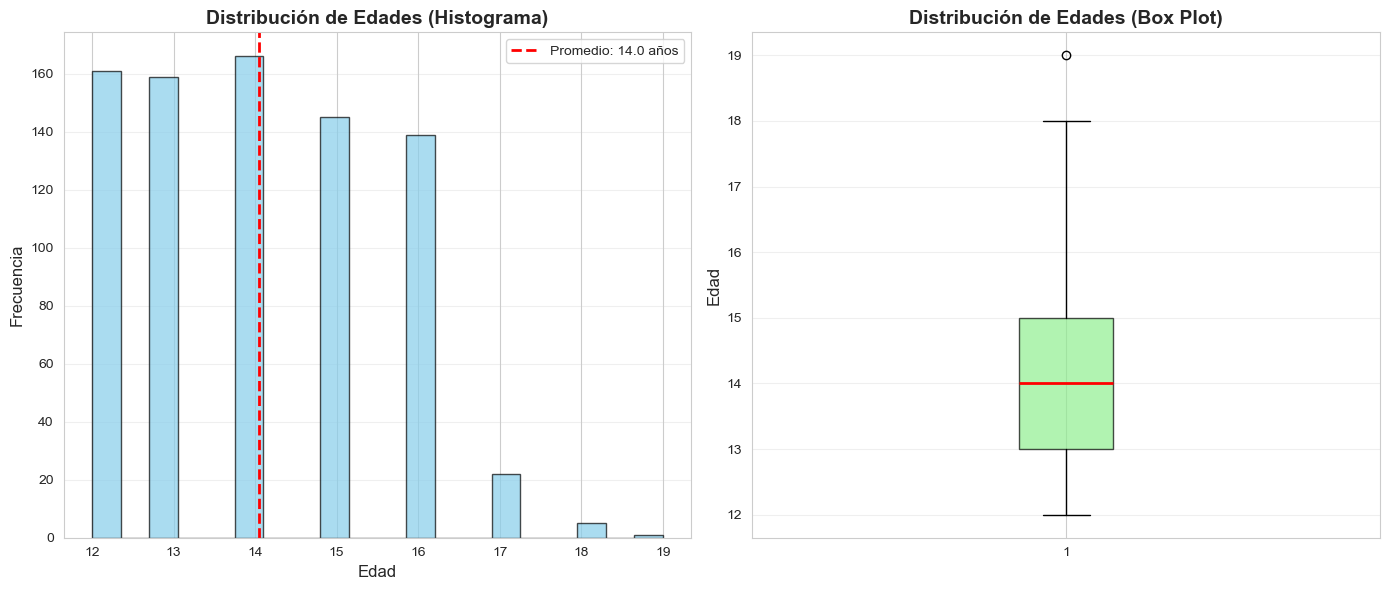


📊 ESTADÍSTICAS DE EDAD:
   • Edad promedio: 14.0 años
   • Edad mediana: 14.0 años
   • Edad mínima: 12 años
   • Edad máxima: 19 años
   • Desviación estándar: 1.5 años

📊 DISTRIBUCIÓN POR RANGOS:
   • 0-6 años: 0 estudiantes
   • 7-9 años: 0 estudiantes
   • 10-12 años: 161 estudiantes
   • 13-15 años: 470 estudiantes
   • 16-18 años: 166 estudiantes
   • 18+ años: 1 estudiantes


In [66]:
# PASO 9.4: Gráfico de distribución de EDADES
print("📊 GRÁFICO 3: Distribución de EDADES")
print("="*80)

col_edad = 'ESTUDIANTE_EDAD_AL_31_DE_MARZO'

if col_edad in df_limpio.columns:
    # Limpiar edades (eliminar nulos)
    edades = df_limpio[col_edad].dropna()
    
    # Crear figura con 2 subgráficos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Gráfico 1: Histograma
    ax1.hist(edades, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax1.set_title('Distribución de Edades (Histograma)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Edad', fontsize=12)
    ax1.set_ylabel('Frecuencia', fontsize=12)
    ax1.grid(axis='y', alpha=0.3)
    
    # Agregar línea de promedio
    edad_promedio = edades.mean()
    ax1.axvline(edad_promedio, color='red', linestyle='--', linewidth=2, label=f'Promedio: {edad_promedio:.1f} años')
    ax1.legend()
    
    # Gráfico 2: Box plot
    bp = ax2.boxplot(edades, vert=True, patch_artist=True, 
                     boxprops=dict(facecolor='lightgreen', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2))
    ax2.set_title('Distribución de Edades (Box Plot)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Edad', fontsize=12)
    ax2.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas
    print(f"\n📊 ESTADÍSTICAS DE EDAD:")
    print(f"   • Edad promedio: {edades.mean():.1f} años")
    print(f"   • Edad mediana: {edades.median():.1f} años")
    print(f"   • Edad mínima: {edades.min():.0f} años")
    print(f"   • Edad máxima: {edades.max():.0f} años")
    print(f"   • Desviación estándar: {edades.std():.1f} años")
    
    # Distribución por rangos
    print(f"\n📊 DISTRIBUCIÓN POR RANGOS:")
    rangos = pd.cut(edades, bins=[0, 6, 9, 12, 15, 18, 100], 
                    labels=['0-6', '7-9', '10-12', '13-15', '16-18', '18+'])
    dist_rangos = rangos.value_counts().sort_index()
    for rango, cantidad in dist_rangos.items():
        print(f"   • {rango} años: {cantidad:,} estudiantes")
else:
    print(f"❌ No se pudieron generar los gráficos")

📊 GRÁFICO 4: Completitud de Datos de APODERADOS


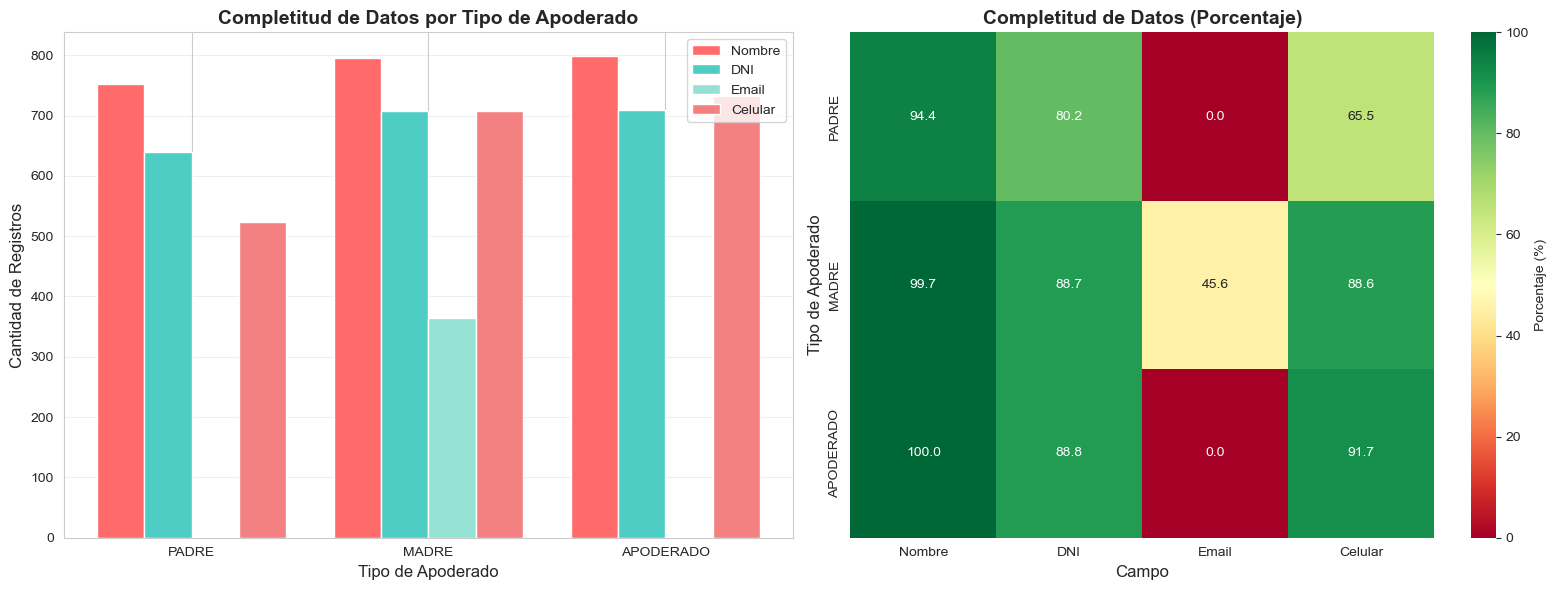


📊 TABLA DE COMPLETITUD (de 798 registros):
Tipo                Nombre        DNI      Email    Celular
--------------------------------------------------------------------------------
PADRE                  753        640          0        523
MADRE                  796        708        364        707
APODERADO              798        709          0        732

💡 NOTA: Email y Celular son OPCIONALES para Web Push


In [67]:
# PASO 9.5: Gráfico de COMPLETITUD DE DATOS (Padre/Madre/Apoderado)
print("📊 GRÁFICO 4: Completitud de Datos de APODERADOS")
print("="*80)

# Analizar completitud de datos por tipo de apoderado
completitud_data = []

# PADRE
padre_nombre = df_limpio['PADRE_APELLIDOS_NOMBRES'].notna().sum()
padre_dni = df_limpio['PADRE_NUMERO_DE_DOCUMENTO'].notna().sum() if 'PADRE_NUMERO_DE_DOCUMENTO' in df_limpio.columns else 0
padre_email = df_limpio['PADRE_CORREO_ELECTRONICO'].notna().sum() if 'PADRE_CORREO_ELECTRONICO' in df_limpio.columns else 0
padre_celular = df_limpio['PADRE_NUMERO_CELULAR'].notna().sum()

# MADRE
madre_nombre = df_limpio['MADRE_APELLIDOS_NOMBRES'].notna().sum()
madre_dni = df_limpio['MADRE_NUMERO_DE_DOCUMENTO'].notna().sum()
madre_email = df_limpio['MADRE_CORREO_ELECTRONICO'].notna().sum()
madre_celular = df_limpio['MADRE_NUMERO_CELULAR'].notna().sum()

# APODERADO
apoderado_nombre = df_limpio['APODERADO_APELLIDOS_NOMBRES'].notna().sum()
apoderado_dni = df_limpio['APODERADO_NUMERO_DE_DOCUMENTO'].notna().sum()
apoderado_email = df_limpio['APODERADO_CORREO_ELECTRONICO'].notna().sum() if 'APODERADO_CORREO_ELECTRONICO' in df_limpio.columns else 0
apoderado_celular = df_limpio['APODERADO_NUMERO_CELULAR'].notna().sum()

# Crear DataFrame de completitud
completitud_df = pd.DataFrame({
    'Tipo': ['PADRE', 'MADRE', 'APODERADO'],
    'Nombre': [padre_nombre, madre_nombre, apoderado_nombre],
    'DNI': [padre_dni, madre_dni, apoderado_dni],
    'Email': [padre_email, madre_email, apoderado_email],
    'Celular': [padre_celular, madre_celular, apoderado_celular]
})

# Crear figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Barras agrupadas
x = np.arange(len(completitud_df))
width = 0.2

ax1.bar(x - 1.5*width, completitud_df['Nombre'], width, label='Nombre', color='#FF6B6B')
ax1.bar(x - 0.5*width, completitud_df['DNI'], width, label='DNI', color='#4ECDC4')
ax1.bar(x + 0.5*width, completitud_df['Email'], width, label='Email', color='#95E1D3')
ax1.bar(x + 1.5*width, completitud_df['Celular'], width, label='Celular', color='#F38181')

ax1.set_xlabel('Tipo de Apoderado', fontsize=12)
ax1.set_ylabel('Cantidad de Registros', fontsize=12)
ax1.set_title('Completitud de Datos por Tipo de Apoderado', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(completitud_df['Tipo'])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Gráfico 2: Heatmap de porcentajes
total = len(df_limpio)
porcentajes = completitud_df.copy()
porcentajes['Nombre'] = (porcentajes['Nombre'] / total * 100).round(1)
porcentajes['DNI'] = (porcentajes['DNI'] / total * 100).round(1)
porcentajes['Email'] = (porcentajes['Email'] / total * 100).round(1)
porcentajes['Celular'] = (porcentajes['Celular'] / total * 100).round(1)

sns.heatmap(porcentajes.set_index('Tipo'), annot=True, fmt='.1f', cmap='RdYlGn', 
            ax=ax2, cbar_kws={'label': 'Porcentaje (%)'}, vmin=0, vmax=100)
ax2.set_title('Completitud de Datos (Porcentaje)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Campo', fontsize=12)
ax2.set_ylabel('Tipo de Apoderado', fontsize=12)

plt.tight_layout()
plt.show()

# Tabla de completitud
print(f"\n📊 TABLA DE COMPLETITUD (de {total:,} registros):")
print("="*80)
print(f"{'Tipo':<15} {'Nombre':>10} {'DNI':>10} {'Email':>10} {'Celular':>10}")
print("-"*80)
for idx, row in completitud_df.iterrows():
    print(f"{row['Tipo']:<15} {row['Nombre']:>10,} {row['DNI']:>10,} {row['Email']:>10,} {row['Celular']:>10,}")

print("\n💡 NOTA: Email y Celular son OPCIONALES para Web Push")

📊 GRÁFICO 5: Comparación ANTES vs DESPUÉS de la limpieza


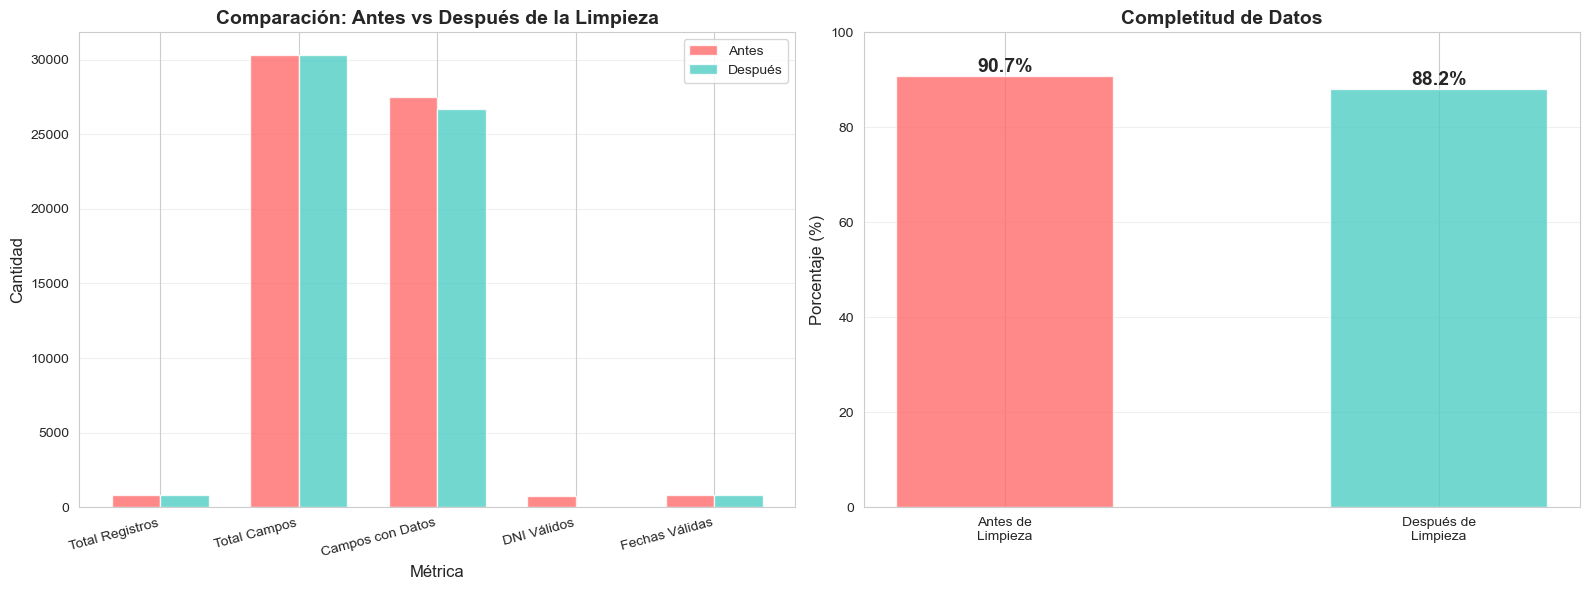


📊 TABLA COMPARATIVA:
         Métrica  Antes  Después
 Total Registros    798      798
    Total Campos  30324    30324
Campos con Datos  27509    26732
     DNI Válidos    779        2
  Fechas Válidas    798      798

📈 Completitud ANTES: 90.7%
📈 Completitud DESPUÉS: 88.2%
📉 Diferencia: 2.6%


In [68]:
# PASO 9.6: Gráfico de CALIDAD DE DATOS (Antes vs Después de limpieza)
print("📊 GRÁFICO 5: Comparación ANTES vs DESPUÉS de la limpieza")
print("="*80)

# Analizar calidad de datos (DNI y fechas)
columna_dni = 'ESTUDIANTE_NUMERO_DE_DOCUMENTO'
columna_fecha = 'ESTUDIANTE_FECHA_DE_NACIMIENTO'

# Datos originales vs limpios
datos_comparacion = {
    'Métrica': [],
    'Antes': [],
    'Después': []
}

# Total de registros
datos_comparacion['Métrica'].append('Total Registros')
datos_comparacion['Antes'].append(len(df))
datos_comparacion['Después'].append(len(df_limpio))

# Campos totales
total_campos_antes = len(df) * len(df.columns)
total_campos_despues = len(df_limpio) * len(df_limpio.columns)
datos_comparacion['Métrica'].append('Total Campos')
datos_comparacion['Antes'].append(total_campos_antes)
datos_comparacion['Después'].append(total_campos_despues)

# Campos con datos
campos_llenos_antes = total_campos_antes - df.isnull().sum().sum()
campos_llenos_despues = total_campos_despues - df_limpio.isnull().sum().sum()
datos_comparacion['Métrica'].append('Campos con Datos')
datos_comparacion['Antes'].append(campos_llenos_antes)
datos_comparacion['Después'].append(campos_llenos_despues)

# DNI válidos (solo si existe la columna)
if columna_dni in df.columns and columna_dni in df_limpio.columns:
    dni_antes = df[columna_dni].notna().sum()
    dni_despues = df_limpio[columna_dni].notna().sum()
    datos_comparacion['Métrica'].append('DNI Válidos')
    datos_comparacion['Antes'].append(dni_antes)
    datos_comparacion['Después'].append(dni_despues)

# Fechas válidas (solo si existe la columna)
if columna_fecha in df.columns and columna_fecha in df_limpio.columns:
    fechas_antes = df[columna_fecha].notna().sum()
    fechas_despues = df_limpio[columna_fecha].notna().sum()
    datos_comparacion['Métrica'].append('Fechas Válidas')
    datos_comparacion['Antes'].append(fechas_antes)
    datos_comparacion['Después'].append(fechas_despues)

# Crear DataFrame
comparacion_df = pd.DataFrame(datos_comparacion)

# Crear figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Barras comparativas
x = np.arange(len(comparacion_df))
width = 0.35

bars1 = ax1.bar(x - width/2, comparacion_df['Antes'], width, label='Antes', color='#FF6B6B', alpha=0.8)
bars2 = ax1.bar(x + width/2, comparacion_df['Después'], width, label='Después', color='#4ECDC4', alpha=0.8)

ax1.set_xlabel('Métrica', fontsize=12)
ax1.set_ylabel('Cantidad', fontsize=12)
ax1.set_title('Comparación: Antes vs Después de la Limpieza', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(comparacion_df['Métrica'], rotation=15, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Gráfico 2: Porcentaje de completitud
completitud_antes = (campos_llenos_antes / total_campos_antes * 100)
completitud_despues = (campos_llenos_despues / total_campos_despues * 100)

categorias = ['Antes de\nLimpieza', 'Después de\nLimpieza']
valores = [completitud_antes, completitud_despues]
colores = ['#FF6B6B', '#4ECDC4']

bars = ax2.bar(categorias, valores, color=colores, alpha=0.8, width=0.5)
ax2.set_ylabel('Porcentaje (%)', fontsize=12)
ax2.set_title('Completitud de Datos', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 100)
ax2.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, (bar, valor) in enumerate(zip(bars, valores)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{valor:.1f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

# Tabla comparativa
print(f"\n📊 TABLA COMPARATIVA:")
print("="*80)
print(comparacion_df.to_string(index=False))
print("\n" + "="*80)
print(f"📈 Completitud ANTES: {completitud_antes:.1f}%")
print(f"📈 Completitud DESPUÉS: {completitud_despues:.1f}%")
print(f"{'📉' if completitud_despues < completitud_antes else '📈'} Diferencia: {abs(completitud_despues - completitud_antes):.1f}%")
print("="*80)

📊 GRÁFICO 6: Dashboard de Resumen General


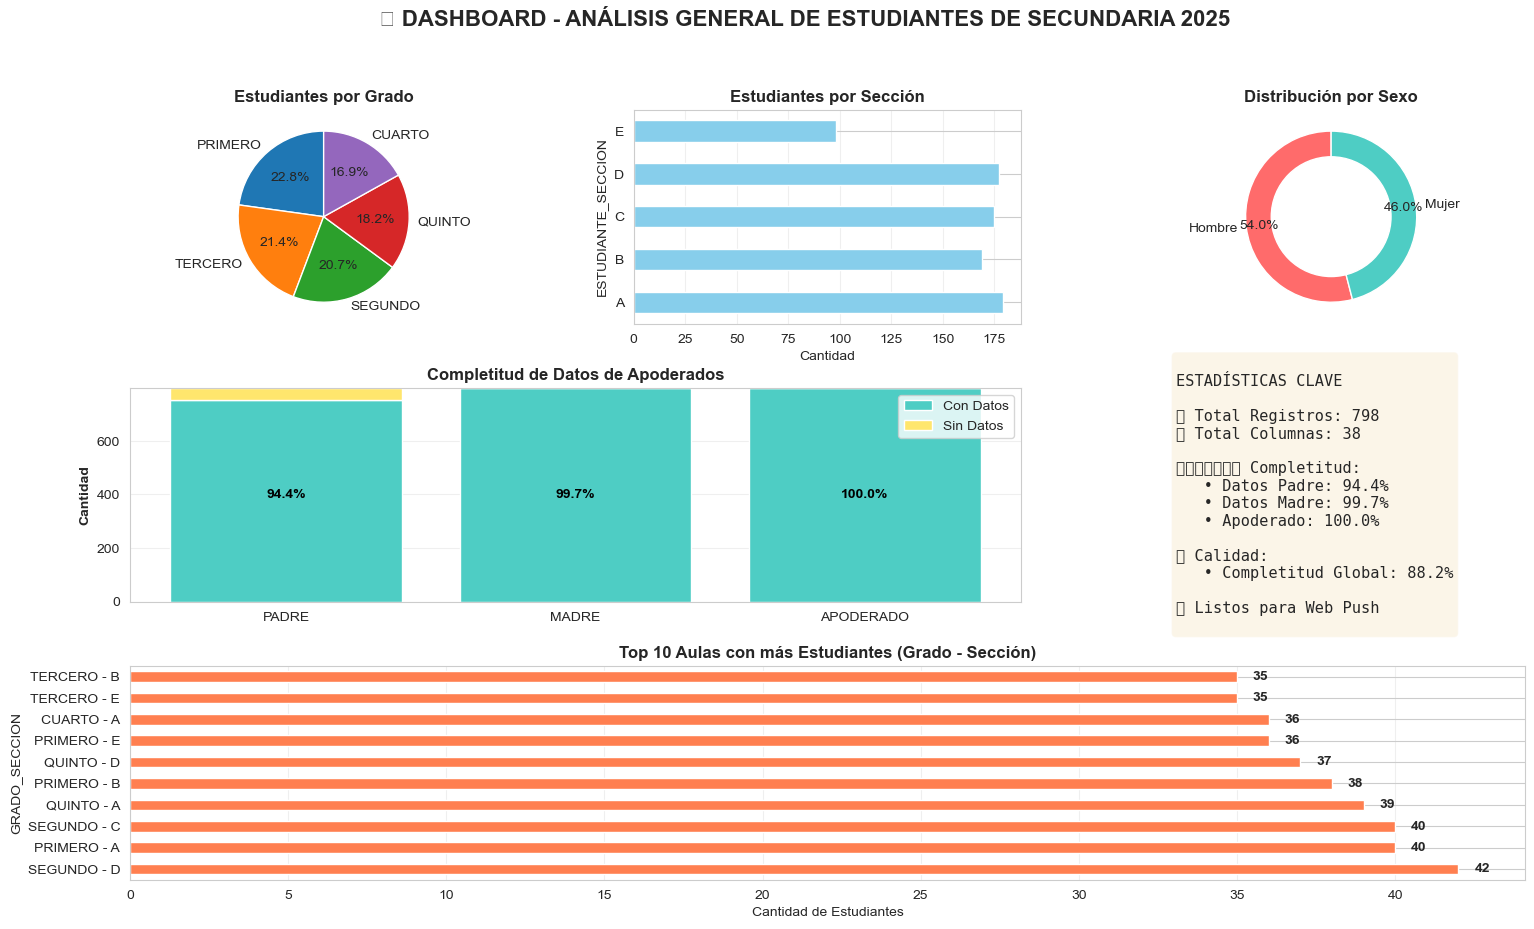


✅ Dashboard generado exitosamente


In [69]:
# PASO 9.7: Dashboard de RESUMEN GENERAL
print("📊 GRÁFICO 6: Dashboard de Resumen General")
print("="*80)

# Crear figura con múltiples subgráficos
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Total de estudiantes por grado (Pie)
ax1 = fig.add_subplot(gs[0, 0])
if 'ESTUDIANTE_GRADO' in df_limpio.columns:
    grados = df_limpio['ESTUDIANTE_GRADO'].value_counts()
    ax1.pie(grados.values, labels=grados.index, autopct='%1.1f%%', startangle=90)
    ax1.set_title('Estudiantes por Grado', fontweight='bold')

# 2. Total de estudiantes por sección (Barras horizontales)
ax2 = fig.add_subplot(gs[0, 1])
if 'ESTUDIANTE_SECCION' in df_limpio.columns:
    secciones = df_limpio['ESTUDIANTE_SECCION'].value_counts().sort_index()
    secciones.plot(kind='barh', ax=ax2, color='skyblue')
    ax2.set_title('Estudiantes por Sección', fontweight='bold')
    ax2.set_xlabel('Cantidad')
    ax2.grid(axis='x', alpha=0.3)

# 3. Distribución por sexo (Donut)
ax3 = fig.add_subplot(gs[0, 2])
if 'ESTUDIANTE_SEXO' in df_limpio.columns:
    sexos = df_limpio['ESTUDIANTE_SEXO'].value_counts()
    colors = ['#FF6B6B', '#4ECDC4']
    wedges, texts, autotexts = ax3.pie(sexos.values, labels=sexos.index, autopct='%1.1f%%',
                                         startangle=90, colors=colors, pctdistance=0.85)
    # Crear efecto donut
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax3.add_artist(centre_circle)
    ax3.set_title('Distribución por Sexo', fontweight='bold')

# 4. Completitud de apoderados (Barras apiladas)
ax4 = fig.add_subplot(gs[1, :2])
padre_completo = df_limpio['PADRE_APELLIDOS_NOMBRES'].notna().sum()
madre_completo = df_limpio['MADRE_APELLIDOS_NOMBRES'].notna().sum()
apoderado_completo = df_limpio['APODERADO_APELLIDOS_NOMBRES'].notna().sum()

categorias = ['PADRE', 'MADRE', 'APODERADO']
completos = [padre_completo, madre_completo, apoderado_completo]
incompletos = [len(df_limpio) - padre_completo, len(df_limpio) - madre_completo, 
               len(df_limpio) - apoderado_completo]

x_pos = np.arange(len(categorias))
p1 = ax4.bar(x_pos, completos, color='#4ECDC4', label='Con Datos')
p2 = ax4.bar(x_pos, incompletos, bottom=completos, color='#FFE66D', label='Sin Datos')

ax4.set_ylabel('Cantidad', fontweight='bold')
ax4.set_title('Completitud de Datos de Apoderados', fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(categorias)
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# Agregar porcentajes
for i, (cat, comp, incomp) in enumerate(zip(categorias, completos, incompletos)):
    total = comp + incomp
    porcentaje = (comp / total * 100)
    ax4.text(i, total/2, f'{porcentaje:.1f}%', ha='center', va='center', 
            fontweight='bold', fontsize=10, color='black')

# 5. Estadísticas clave (Texto)
ax5 = fig.add_subplot(gs[1, 2])
ax5.axis('off')

stats_text = f"""
ESTADÍSTICAS CLAVE

📊 Total Registros: {len(df_limpio):,}
📋 Total Columnas: {len(df_limpio.columns)}

👨‍👩‍👧‍👦 Completitud:
   • Datos Padre: {(padre_completo/len(df_limpio)*100):.1f}%
   • Datos Madre: {(madre_completo/len(df_limpio)*100):.1f}%
   • Apoderado: {(apoderado_completo/len(df_limpio)*100):.1f}%

📈 Calidad:
   • Completitud Global: {((len(df_limpio)*len(df_limpio.columns) - df_limpio.isnull().sum().sum())/(len(df_limpio)*len(df_limpio.columns))*100):.1f}%
   
✅ Listos para Web Push
"""

ax5.text(0.1, 0.5, stats_text, transform=ax5.transAxes, fontsize=11,
        verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3),
        family='monospace')

# 6. Top 5 grados con más estudiantes
ax6 = fig.add_subplot(gs[2, :])
if 'ESTUDIANTE_GRADO' in df_limpio.columns and 'ESTUDIANTE_SECCION' in df_limpio.columns:
    # Crear combinación grado-sección
    df_limpio['GRADO_SECCION'] = df_limpio['ESTUDIANTE_GRADO'] + ' - ' + df_limpio['ESTUDIANTE_SECCION']
    top_combinaciones = df_limpio['GRADO_SECCION'].value_counts().head(10)
    
    top_combinaciones.plot(kind='barh', ax=ax6, color='coral')
    ax6.set_title('Top 10 Aulas con más Estudiantes (Grado - Sección)', fontweight='bold')
    ax6.set_xlabel('Cantidad de Estudiantes')
    ax6.grid(axis='x', alpha=0.3)
    
    # Agregar valores
    for i, v in enumerate(top_combinaciones.values):
        ax6.text(v + 0.5, i, str(v), va='center', fontweight='bold')

plt.suptitle('📊 DASHBOARD - ANÁLISIS GENERAL DE ESTUDIANTES DE SECUNDARIA 2025', 
            fontsize=16, fontweight='bold', y=0.98)

plt.show()

print("\n✅ Dashboard generado exitosamente")

---
## ✅ FIN DEL ANÁLISIS

**Resumen de visualizaciones generadas:**
1. ✅ Distribución por Grado y Sección (Heatmap + Barras)
2. ✅ Distribución por Sexo (Pie Chart + Barras)
3. ✅ Distribución de Edades (Histograma + Box Plot)
4. ✅ Completitud de Datos de Apoderados (Barras + Heatmap)
5. ✅ Comparación Antes vs Después de Limpieza
6. ✅ Dashboard General Completo

**Archivo generado:** `estudiantes_apoderados_2025_LIMPIO.csv`

**Próximo paso:** Importar datos a Supabase 🚀

In [21]:
# DIAGNÓSTICO: Verificar DNI de estudiantes
print("🔍 DIAGNÓSTICO DE DNI DE ESTUDIANTES")
print("="*60)

# Verificar columna en df original
if 'ESTUDIANTE_NUMERO_DE_DOCUMENTO' in df.columns:
    dni_validos_original = df['ESTUDIANTE_NUMERO_DE_DOCUMENTO'].notna().sum()
    total_original = len(df)
    print(f"\n📄 DataFrame ORIGINAL (df):")
    print(f"   Total registros: {total_original}")
    print(f"   Con DNI: {dni_validos_original}")
    print(f"   Sin DNI: {total_original - dni_validos_original}")
    print(f"\n   Ejemplos de DNI:")
    ejemplos_dni = df['ESTUDIANTE_NUMERO_DE_DOCUMENTO'].dropna().head(5).tolist()
    print(f"   {ejemplos_dni}")
else:
    print("❌ Columna ESTUDIANTE_NUMERO_DE_DOCUMENTO no existe en df")

# Verificar columna en df_limpio
if 'ESTUDIANTE_NUMERO_DE_DOCUMENTO' in df_limpio.columns:
    dni_validos_limpio = df_limpio['ESTUDIANTE_NUMERO_DE_DOCUMENTO'].notna().sum()
    total_limpio = len(df_limpio)
    print(f"\n📄 DataFrame LIMPIO (df_limpio):")
    print(f"   Total registros: {total_limpio}")
    print(f"   Con DNI: {dni_validos_limpio}")
    print(f"   Sin DNI: {total_limpio - dni_validos_limpio}")
    print(f"\n   Ejemplos de DNI:")
    ejemplos_dni_limpio = df_limpio['ESTUDIANTE_NUMERO_DE_DOCUMENTO'].dropna().head(5).tolist()
    print(f"   {ejemplos_dni_limpio}")
else:
    print("❌ Columna ESTUDIANTE_NUMERO_DE_DOCUMENTO no existe en df_limpio")

🔍 DIAGNÓSTICO DE DNI DE ESTUDIANTES

📄 DataFrame ORIGINAL (df):
   Total registros: 798
   Con DNI: 779
   Sin DNI: 19

   Ejemplos de DNI:
   [77927245.0, 80808595.0, 77925990.0, 77644801.0, 63781543.0]

📄 DataFrame LIMPIO (df_limpio):
   Total registros: 798
   Con DNI: 2
   Sin DNI: 796

   Ejemplos de DNI:
   ['64771250', '24794300']
